In [2]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.animation as animation
from IPython.display import HTML

plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
np.random.seed()

# Gay-Lussac's Law

In [67]:
N = 1000 # number of particles
dt = 0.1 # time step size
time = 1000 # number of "frames"

def init(v0):
    x = np.random.rand(N)
    y = np.random.rand(N)
    vx = v0*np.cos(2*np.pi*np.random.rand(N))
    vy = v0*np.sin(2*np.pi*np.random.rand(N))
    return x,y,vx,vy

def model(T):
    collisions = {"right_collision": 0, "left_collision": 0, "top_collision": 0, "bottom_collision": 0}
    a = 1
    m = 1
    v0 = a*np.sqrt(T)
    x,y,vx,vy = init(v0)
    
    # simulation part
    for t in range(time):
        for i in range(N): #loop over molecules
            x[i] += vx[i]*dt
            y[i] += vy[i]*dt
            if x[i] > 1:
                vx[i] = -vx[i]
                collisions["right_collision"] = collisions["right_collision"] - 2*m*vx[i]
            if x[i] < 0:
                vx[i] = -vx[i]
                collisions["left_collision"] = collisions["left_collision"] + 2*m*vx[i]
            if y[i] > 1:
                vy[i] = -vy[i]
                collisions["top_collision"] = collisions["top_collision"] - 2*m*vy[i]
            if y[i] < 0:
                vy[i] = -vy[i]
                collisions["bottom_collision"] = collisions["bottom_collision"] + 2*m*vy[i]
    return collisions

temperatures = np.linspace(0,10,11)
p = list()
for T in temperatures:
    pressures = model(T)
    p.append(np.average(list(pressures.values())))

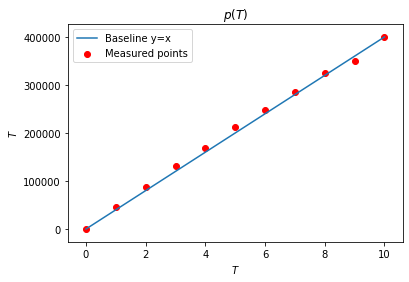

In [68]:
plt.plot(np.linspace(0,10,11),np.linspace(0,400000, 11), label='Baseline y=x')
plt.scatter(temperatures, p, color='red', label='Measured points')
plt.title(r'$p(T)$')
plt.xlabel(r'$T$')
plt.ylabel(r'$T$')
plt.legend()
plt.show()

# Sun-Earth-Moon